# Math 104 A Howework 1
##### Qingze Lan 3046380

1 (a). The Intermediate Value Theorem states that, if f is a continuous on the interval $[a,b]$, and m is a number such that m is between f(a) and f(b), then there must exist at least one value c within the interval $[a,b]$ such that f(c)= m. 

1 (b). The mean value theorem states that, suppose the function f(x) satisfies that f(x) is continuous on the closed interval $[a,b]$ and differentiable on the open interval (a,b), then there must exist a number c such a<c<b and 
$f^{'}(c)=\frac{f(b)-f(a)}{b-a}$, or, equivalently, $$f(b)-f(a)=f^{'}(c)(b-a)$$.

1 (c). Rolle's Theorem states that, suppose the function f(x) satisfies that f(x) is continuouson the closed interval $[a,b]$, differentiable on the open interval (a,b), and f(a) = f(b), then there exists a number c such that a < c < b and $$f^{'}(c)=0$$. 

1(d). The Mean value theorem for integrals states that, if f is a continuous function on the closed, bounded interval $[a,b]$, then there is at least one number c in (a,b) for which $$f(c)=\frac{1}{b-a}\int^{b}_{a}f(t)dt$$.

1(e). The Weighted Mean Value Theorem for Integrals states that, suppose f is continuous on the interval $[a,b]$ and g is integrable and constant sign on $[a,b]$, then $$\int^{b}_{a}f(x)g(x)dx=f(c)\int^{b}_{a}g(x)dx$$ for some $c\in(a,b)$.

In [ ]:
# According to the question we need to implement the formula of Composite Trapezoidal Rule quadrature first. 
# We use the variables: f, the function f(x) that we want to know the integral; a and b, the interval of the integral, and n, the number of points, including a and b, that we want to use to calculate the integral. 
# According to this method, h, which is the distance between each point, is equal to (b-a)/n. 

In [71]:
import numpy as np
def CTR(f, a, b, n):
    h = (b-a)/float(n)
    base = (f(a)+f(b))/2.0
    x_i = np.linspace(a+h,b-h,n-1)
    np_f = np.vectorize(f)
    return (np.sum(np_f(x_i))+ base) * h

2(a). We need to first implement the function f(x) in this question as following: 

In [72]:
def f_a(x):
    result = 1/(1+x)**2
    return result
    
    

$\int^{2}_{0}\frac{1}{(1+x)^2}dx = \frac{2}{3}$ 

When h = $\frac{2}{20}$, n = 20. When h = $\frac{2}{40}$, n = 40. When h = $\frac{2}{80}$, n = 80. Hence we can put these values into the function CTR and calculate the difference. 

In [73]:
error_1=abs(2/3-CTR(f_a,0,2,20))
error_2=abs(2/3-CTR(f_a,0,2,40))
error_3=abs(2/3-CTR(f_a,0,2,80))

In [74]:
error_1

0.001601642128347014

In [75]:
error_2

0.0004010274624657306

In [76]:
error_3

0.00010029568053082638

In [77]:
error_2/error_1 

0.25038518615866695

In [78]:
error_3/error_2

0.2500967886691726

From the above results we can verify that, while our value of n doubled in each step, the decrease factor is about $\frac{1}{4}$, which shows that $T_h$ has a convergent trend at the expected quadratic rate. 

2(b). We need first define this function. 

In [79]:
from math import sqrt
def f_b(x):
    return sqrt(x)

In [80]:
CTR(f_b,0,1,16)

0.6635811968772283

In [81]:
CTR(f_b,0,1,32)

0.6655589362789418

In [82]:
CTR(f_b,0,1,64)

0.6662708113785067

In [83]:
CTR(f_b,0,1,128)

0.666525657296826

$\int^{1}_{0}\sqrt{x}dx = \frac{2}{3}$

In [84]:
error_1b=abs(2/3-CTR(f_b,0,1,16))
error_2b=abs(2/3-CTR(f_b,0,1,32))
error_3b=abs(2/3-CTR(f_b,0,1,64))
error_4b=abs(2/3-CTR(f_b,0,1,128))

In [85]:
error_1b

0.0030854697894383554

In [86]:
error_2b

0.0011077303877248257

In [87]:
error_3b

0.00039585528815988535

In [88]:
error_4b

0.00014100936984062784

Check if there is a second order convergence to the exact value of the integral: 
When N=16, h=$\frac{1}{16}$.
When N=32, h=$\frac{1}{32}$.
When N=64, h=$\frac{1}{64}$.
When N=128, h=$\frac{1}{128}$.
Assume there is a second order convergence, then we assume there exist a constant C such that the error is always smaller than $Ch^2$

In [89]:
abs(error_1b)/(1/16)**2

0.789880266096219

In [90]:
abs(error_2b)/(1/32)**2

1.1343159170302215

In [91]:
abs(error_3b)/(1/64)**2

1.6214232603028904

In [92]:
abs(error_4b)/(1/128)**2

2.3102975154688465

From the result above we can see that, as h gets smaller, the value of C increase. Therefore, we cannot find a constant C that satisfies all the value of h. 

3. Firstly we need to write the function: $cosx^2$

In [93]:
def func3a(x):
    return np.cos(x**2)

Rewrite the CTR function for convenience: 

In [106]:
def CTR2(f,a,b,h):
    n =int((b-a)//h)
    base = (f(a)+f(b))/2.0
    x_i = np.linspace(a+h,b-h,(n-1))
    np_f = np.vectorize(f)
    return (np.sum(np_f(x_i))+ base) * h

Then write the function for q(h) and find h for which q(h) is approximately equal to 4 by trying many times. 

In [107]:
def q(h):
    return (CTR2(func3a,0,(np.pi/2)**(1/2),h/2)-CTR2(func3a,0,(np.pi/2)**(1/2),h))/(CTR2(func3a,0,(np.pi/2)**(1/2),h/4)-CTR2(func3a,0,(np.pi/2)**(1/2),h/2))

In [108]:
h_i = np.linspace(0.0001,0.1,10000)
n_q = np.vectorize(q)
q_h = n_q(h_i)
idx = np.where(q_h == (np.min(np.abs(q_h-4))+4))

In [109]:
h_i[idx]

array([0.06962736])

When h is equal to 0.06962736, q(h) is most close to 4. 

3(b).Calculate the result by the formula: $C_{2}h^{2}=\frac{4}{3}(T_{h/2}[f]-T_h[f])$

In [110]:
h_b = 0.06962736 
Th= CTR2(func3a,0,(np.pi/2)**(1/2),h_b)
Th_2=CTR2(func3a,0,(np.pi/2)**(1/2),h_b/2)

In [29]:
Error = 4/3*(Th_2-Th)
Error

0.0010137495978749613

Therefore, the error is 0.0010137495978749613 with this h value. 

3(c). $I[f]=T_{h}[F]+C_{2}h^{2}+R(h)$. When R(h) is close to 0, the new approximation is: 

In [184]:
Th+Error

0.9774344377774062

3(d).$S_{h}[cosx^2] = T_{h}[cosx^2] + \frac{4}{3}(T_{h/2}[f]-T_h[f])$  

$I[f]=T_{h}[F]+C_{2}h^{2}+R(h) = S_{h}[cosx^2]+R(h)$

We can see from these two formula that $S_h[cosx^2]$ is more accurate.

When we decrease the value of h, for example, when we choose $\frac{h}{2}$,$S_{\frac{h}{2}}[cosx^2] = T_{\frac{h}{2}}[cosx^2] + \frac{4}{3}(T_{h/4}[f]-T_{h/2}[f])$,

$I[f]=T_{h/2}[F]+\frac{1}{4}C_{2}h^{2}+R(h/2) = S_{h}[cosx^2]+R(h/2)$

Therefore, when we decrease h to h/2, there is also a decrease in the value of error from $C_2h^2$ to $\frac{1}{4}C_2h^2$ for $S_h[cosx^2]$, therefore it converges faster. 


4. V is a vector space. We want to prove that a norm $\|\cdot\|$ on V defines a continuous function from V to the interval $[0,\infty)$

According to the definition of norm, a norm on a vector-space V over a field $k=\mathbb{R}(or\mathbb{C})$ is a mapping $\|\cdot\|: V \rightarrow$ $[0,\infty]$. Therefore, we need to show that it is always continuous on this interval. 

Suppose x,y $\in V$, from the reverse of triangle inequality of norms, we have $$\|\|x\|-\|y\|\le\|x-y\|\|$$ Therefore, the distance between $\|x\|$ and $\|y\|$ is always smaller or equal to the distance between x and y. 

For any $\epsilon \ge 0$, we choose $\delta = \epsilon$, then whenever $\|x-y\|\le\delta$, we have $$\|\|x\|-\|y\|\|\le\delta=\epsilon \forall x,y\in V$$
Therefore, the function $\|\cdot\|$ is continuous at every point in V, thus it is continuous. 




5. In $\mathbb{R}^2$, the norms are defined as following:
$$\|(x,y)\|_1=\|x\|+\|y\|$$
$$\|(x,y)\|_2=\sqrt{x^2+y^2}$$
$$\|(x,y)\|_{\infty}=max\{|x|,|y|\}$$
As the question doens't tell whether the ball is open or closed, I assume that this ball is closed. Therefore the unit ball of $\|\cdot\|_1$ is,$$B_{\|\cdot\|_1}=\{(x,y)\in\mathbb{R}^2:|x|+|y|\le1\}$$ and I draw the following picture in desmos.com. 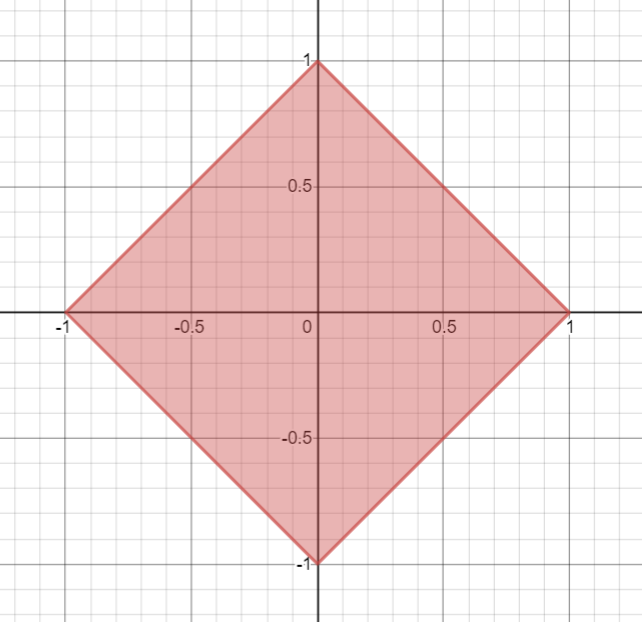

The unit ball of $\|\cdot\|_2$ is, $$B_{\|\cdot\|_2}=\{(x,y)\in\mathbb{R}^2:\sqrt{x^2+y^2}\le1\}$$
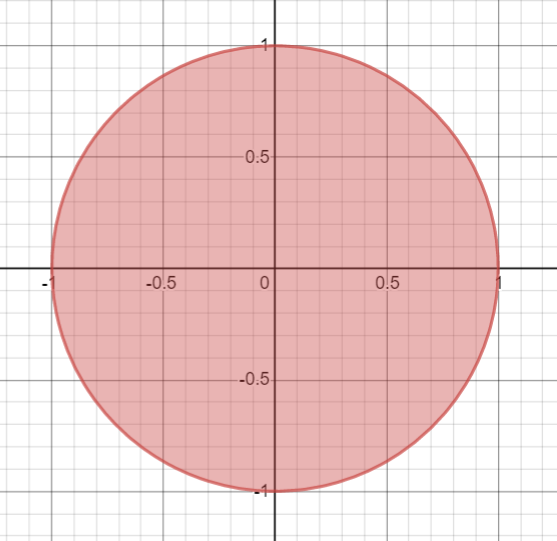




The unit ball of $\|\cdot\|_{\infty}$ is, $$B_{\|\cdot\|_{\infty}}=\{(x,y)\in\mathbb{R}^2:max\{|x|,|y|\}\le1\}$$
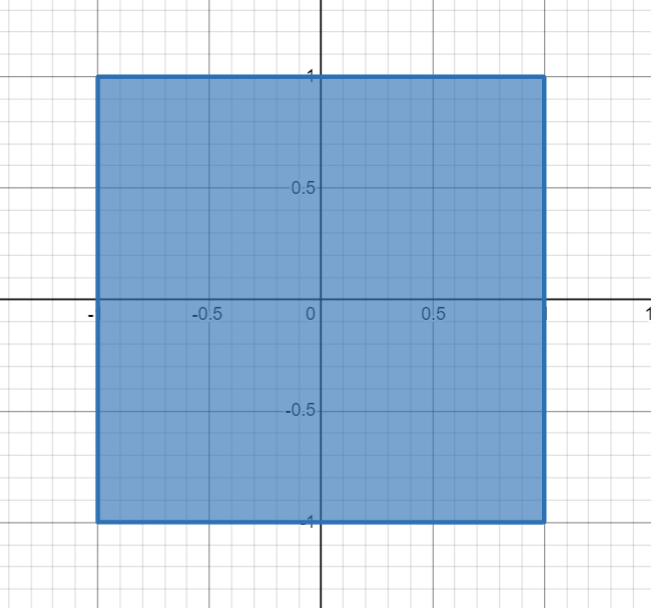

6. The sequence of numbers $M_n = \|f_n-f\|_{\infty} = sup_{x\in[a,b]}|f_n-f|$ according to the definition.

1). prove if $M_n$ converges to zero as n goes to infinity, then {$f_n$} converges uniformly to f in the interval $[a,b]$.

As $M_n$ converges to zero as n goes to infinity, $$\forall \epsilon\ge0,\exists N\,such\, that\,\forall n\ge N, |M_n-0|<\epsilon$$


Which means$$\forall \epsilon\ge0,\exists N\,such\, that\,\forall n\ge N, |sup|f_n-f|-0|<\epsilon$$

As $|f_n-f|\ge0$, $sup|f_n-f|\ge0$, therefore, we get 
$$\forall \epsilon\ge0,\exists N\,such\, that\,\forall n\ge N, sup|f_n-f|<\epsilon$$

sup|$f_n-f$| is the upperbound for |$f_n-f$|, therefore, $$|f_n-f|\le sup|f_n-f|<\epsilon\forall n\ge N$$ according to the definition of uniformly convergent, $\{f_n\}$ converges to f. 

2). Prove if $\{f_n\}$ converges uniformly to f in the interval $[a,b]$, then $M_n$ converges to zero. 

$\{f_n\}$ converges uniformy to f, then $$\forall \epsilon\ge 0, \exists N_2 \text{ such that }\forall n\ge N_2, |f_n-f|<\epsilon$$ so $\epsilon$ is the upperbound of |$f_n-f$|

so that $sup|f_n-f|\le \epsilon$, $$|sup|f_n-f|-0|\le \epsilon \,\forall n\ge N_2$$Therefore, it converges to 0.  


Therefore, the statement in the question holds. 


7.(a) $|f_n(x)-f(x)|=|\frac{1}{n}(x-x^2)|,\,x\in[0,1]$

In this interval, $x\ge x^2$ and $0\le x-x^2 \le 1$

$|\frac{1}{n}(x-x^2)|=\frac{1}{n}(x-x^2)\le \frac{1}{n}$

$\frac{1}{n}$ converges to 0 as n goes to infinity, therefore, $$\forall\epsilon \ge 0, \exists N \,such\,that\, \forall n\ge N, |\frac{1}{n}-0|<\epsilon$$
$$|\frac{1}{n}|< \epsilon$$

Therefore, $$\forall \epsilon\ge 0, \exists N \,such\,that\, \forall n\ge N, |\frac{1}{n}(x-x^2)|\le \frac{1}{n}<\epsilon$$

Therefore, $f_n$ converges to $f=x^2, x\in[0,1]$

7(b). No, it is not uniformly convergence. If $f_n(x)=x^n$ does converge uniformly, then the limit of f(x) must be 0 when x is not equal to 1 and be 1 when x is equal to 1. If we take x not equal to 1 as an example, then we need to show that $$\forall \epsilon\ge 0, \exists N, \forall n\ge N, |x^n-0|<\epsilon$$

Choose $\epsilon = \frac{1}{2}$ for example, choose n = N and x = $(\frac{4}{5})^{\frac{1}{N}}$.
x is always less than 1. 

$$|f_n(x)-0|=x^n-0=\frac{4}{5}>\frac{1}{2}$$

That contradict to the definition of uniformly converge. Therefore, it is not converge uniformly.